## Table of Contents
* [1. Importing Libraries](#1.-Importing-Libraries)
* [2. Importing Data](#2.-Importing-Data)
* [3. Data Wrangling](#3.-Dara-Wrangling)
* [4. Time-Series Analysis: Decomposition](#4.-Time-Series-Analysis:-Decomposition)
* [5. Testing for Stationarity](#5.-Testing-for-Stationarity)
* [6. Temporal Analysis](#6.-Temporal-Analysis)
* [7. Exporting Data](#7.-Exporting-Data)

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
import folium
import json
import geopandas as gpd

In [3]:
# This option ensures the graphs are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 2. Importing Data

In [4]:
# Define path

path = r'C:\Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 6 SDG'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','merged_df.csv'))

## 3. Data Wrangling

In [6]:
df.head()

,Unnamed: 0,country,year,sdg_index,no_poverty,zero_hunger,good_health,quality_education,gender_equality,clean_water,...,reduced_inequalities,sustainable_cities,responsible_consumption,climate_action,underwater_life,land_life,peace_justice,partnerships,gdp,gdp_category
0,0,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2,449.363154,Low GDP
1,1,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2,449.363154,Low GDP
2,2,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2,183.532775,Low GDP
3,3,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2,200.462376,Low GDP
4,4,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2,221.657662,Low GDP


In [7]:
# Dropping the 'Unnamed: 0' index column

df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.shape

(3818, 22)

In [9]:
df.columns

Index(['country', 'year', 'sdg_index', 'no_poverty', 'zero_hunger',
       'good_health', 'quality_education', 'gender_equality', 'clean_water',
       'affordable_energy', 'economic_growth', 'infrastructure_innovation',
       'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
       'climate_action', 'underwater_life', 'land_life', 'peace_justice',
       'partnerships', 'gdp', 'gdp_category'],
      dtype='object')

In [10]:
# Creating a subset from years and SDG Index for data series analysis

df_time = df[['year', 'sdg_index']]

In [11]:
df_time.head()

,year,sdg_index
0,2000,36.0
1,2001,36.3
2,2002,36.3
3,2003,36.7
4,2004,37.1


In [12]:
df_time.shape

(3818, 2)

In [13]:
# Creating a subset with only years and averaged SDG Indexes per year

sub = df_time.groupby('year').mean()

In [14]:
sub

,sdg_index
year,
2000,60.451205
2001,60.650000
2002,60.912651
2003,61.098193
2004,61.389157
2005,61.698795
2006,61.998193
2007,62.228313
2008,62.510241


In [15]:
# Resetting the index

sub.reset_index(level=0, inplace=True)

In [16]:
sub

,year,sdg_index
0,2000,60.451205
1,2001,60.650000
2,2002,60.912651
3,2003,61.098193
4,2004,61.389157
5,2005,61.698795
6,2006,61.998193
7,2007,62.228313
8,2008,62.510241
9,2009,62.884337


In [17]:
# Preparing the subset for time series plotting

# Set the 'year' column as the index with an annual frequency

sub['datetime'] = pd.to_datetime(sub['year'], format='%Y')
sub = sub.set_index('datetime')
sub.index.freq = 'AS-JAN'  # Set the frequency to annual starting in January
sub.drop(['year'], axis=1, inplace=True)

sub.head()

,sdg_index
datetime,
2000-01-01,60.451205
2001-01-01,60.650000
2002-01-01,60.912651
2003-01-01,61.098193
2004-01-01,61.389157


#### I selected the year and sdg_index columns because that's what I'm interested in analysing. I am using the mean of the SDG Index to see the overall trend in the world.

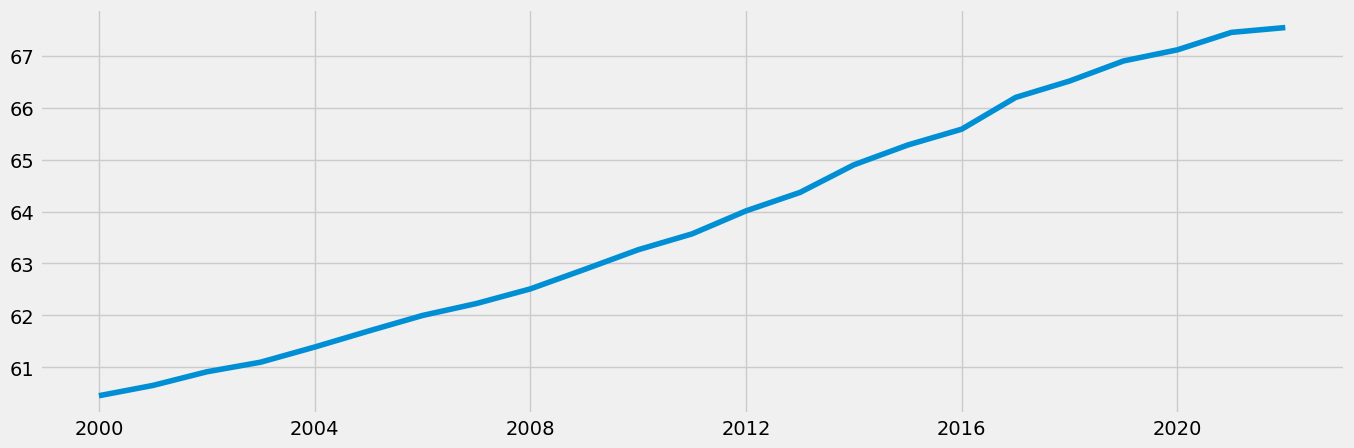

In [18]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(sub)

#### We can see there is an upward trend in the data, however given the fact that the progress for the past 22 years only sits at about 60-70%  (and increased only by 6%) of the necessary speed, it seems unlikely that the world will hit their targets by 2030.

## 4. Time-Series Analysis: Decomposition

In [19]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub, model='additive')

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

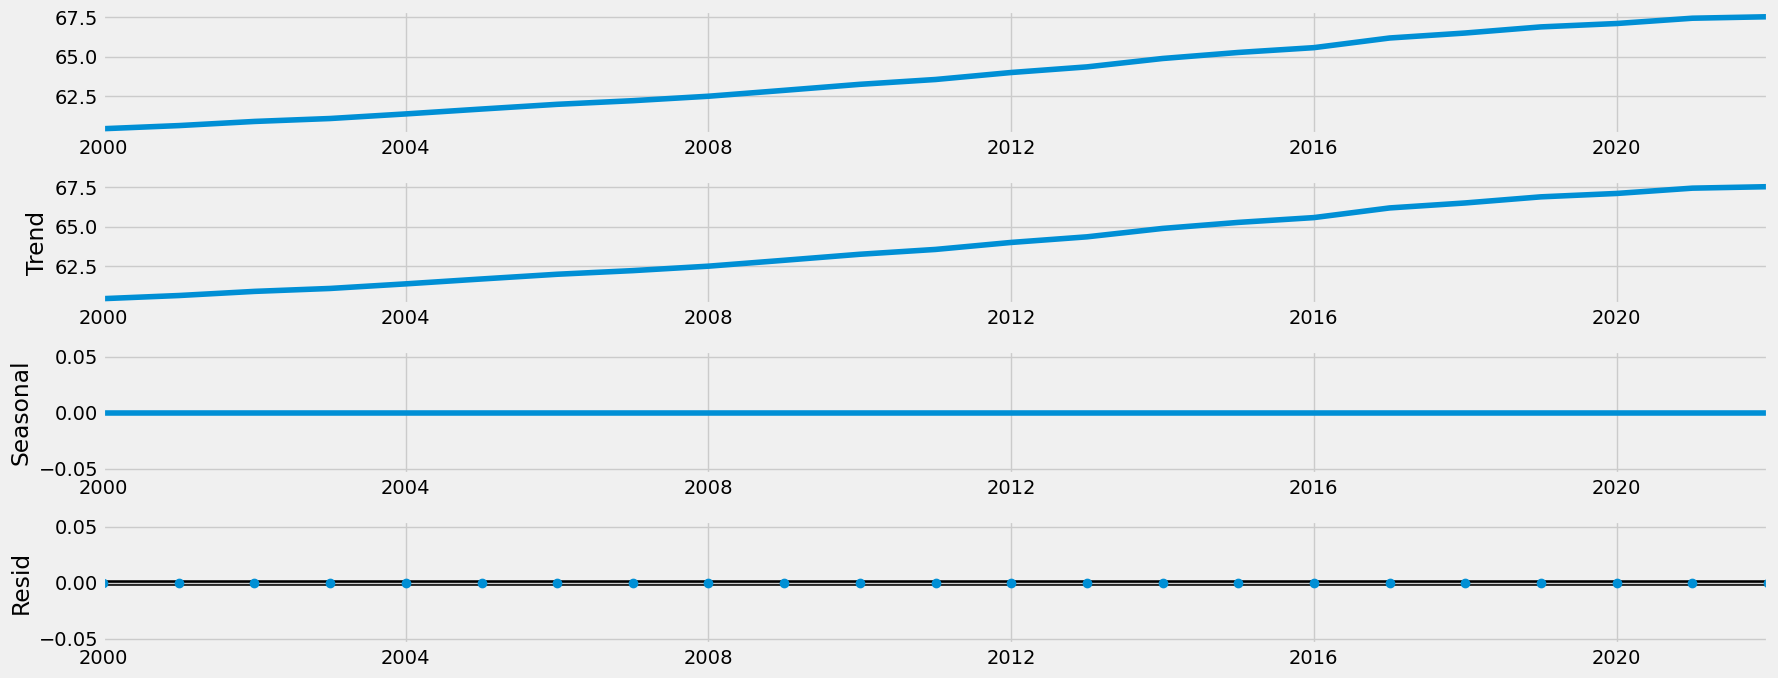

In [21]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The decomposition shows that the data has a trend (upward), has no seasonality and no noise. Given the fact that we don't have many points to analyse, if we had data for a longer period of time, or monthly/quarterly figures, the above metrics might be different. Also checking the time series for a specific country would also yeald different results.

## 5. Testing for Stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why I need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['sdg_index'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.602906
p-value                         0.005706
Number of Lags Used             5.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


#### The Test Statistic is lower than the Critical Value at 5%, which would indicate that the data is fairly stationary (we can reject the null hypothesis of existance of unit root ). If we wanted to compare it to the Critical Value at 1% significance level, then the data would need stationarising. I will first check autocorrelation to see what it says before making a decision.

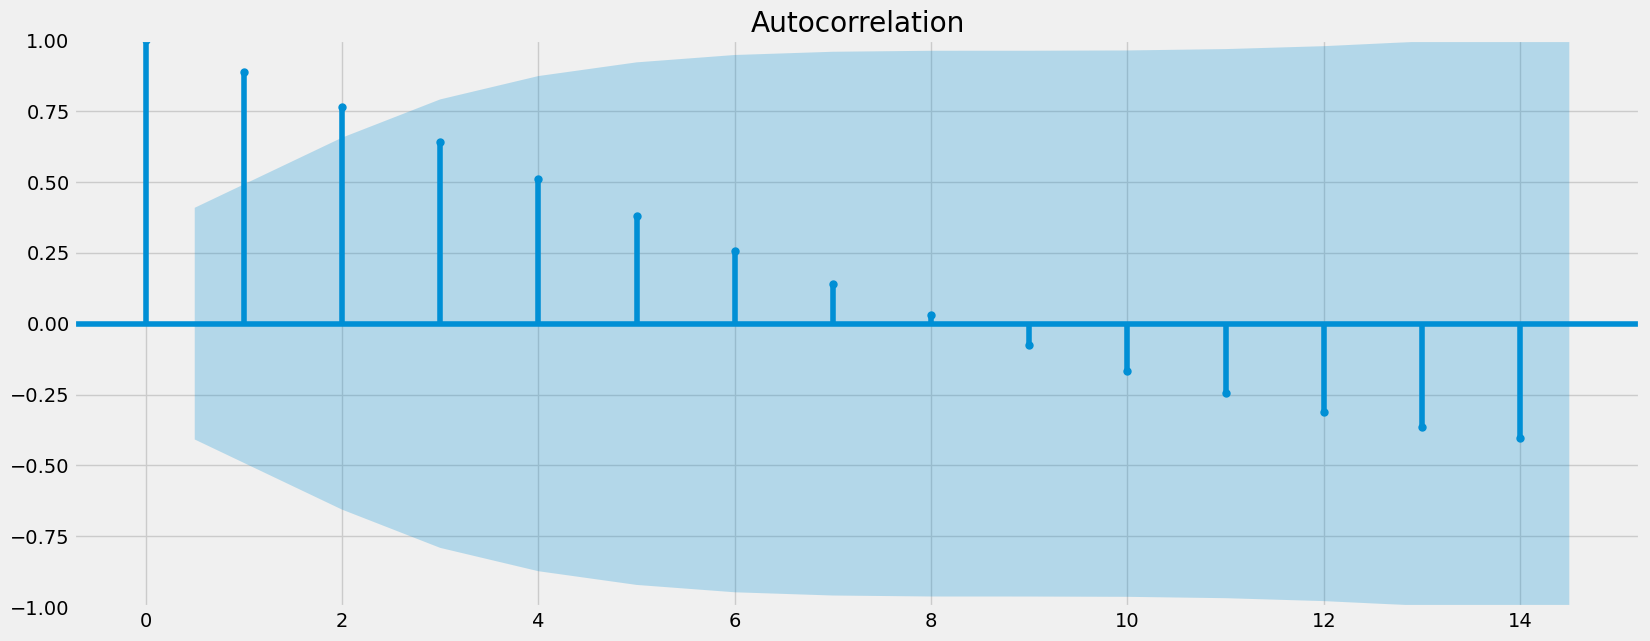

In [23]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub)
plt.show()

#### There are only 3 lags significantly correlated (outside of the confidence interval in blue). I will not be manipulating data to make it more stationarized becase of  the unspoken rule of thumb that you need at least ten significant lags for differencing to be necessary.

## 6. Temporal Analysis

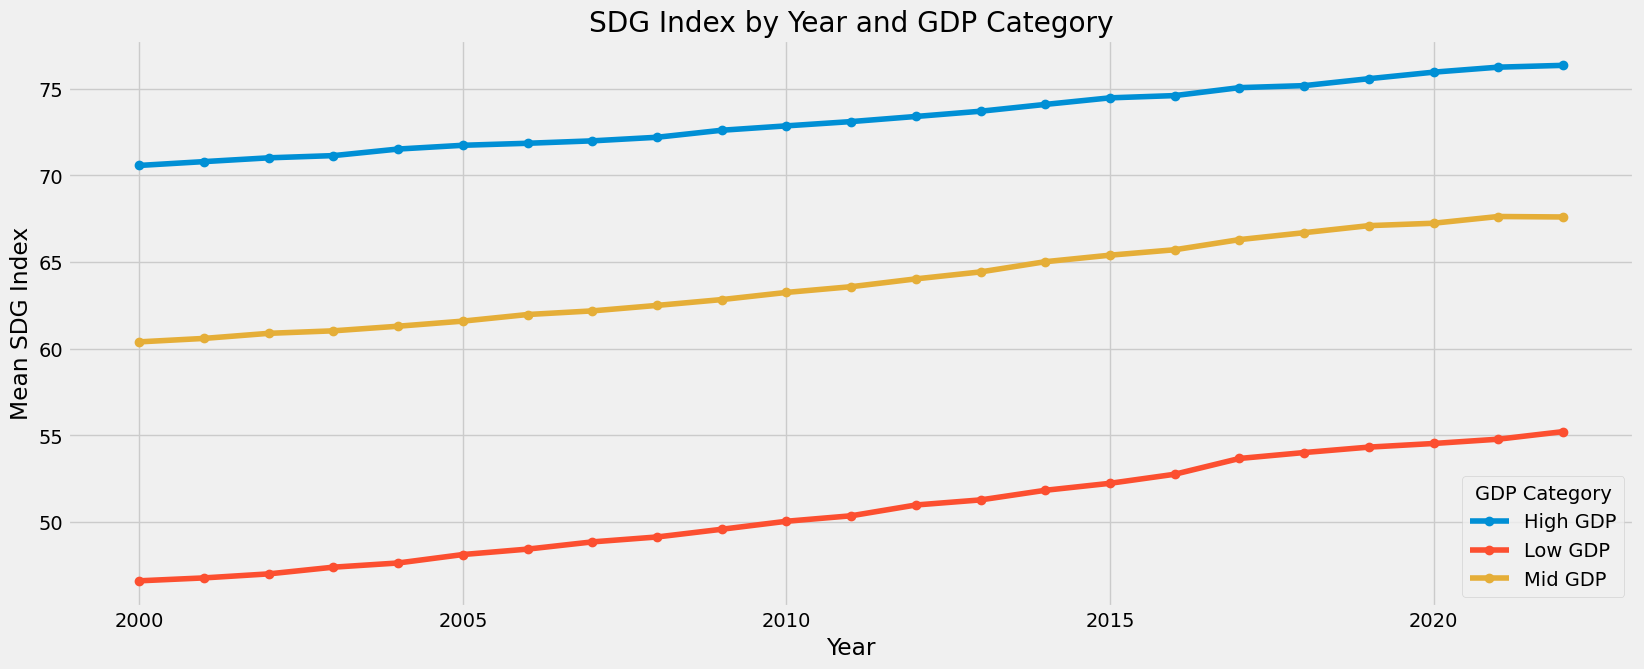

In [24]:
# Calculate the mean SDG index for each year and GDP category
df['mean_sdg_index'] = df.groupby(['year', 'gdp_category'])['sdg_index'].transform('mean')

# Create a crosstab with mean SDG indexes
crosstab = pd.crosstab(index=df['year'], columns=df['gdp_category'], values=df['mean_sdg_index'], aggfunc='last')

# Plot the crosstab as lines
crosstab.plot(kind='line', marker='o')

# Customize the plot (labels, title, legend, etc.)
plt.xlabel('Year')
plt.ylabel('Mean SDG Index')
plt.title('SDG Index by Year and GDP Category')
plt.legend(title='GDP Category')

# Show the plot
plt.show()

#### Analysing the SDG Index change for GDP categories indicate that all categories have been increasing the progress over the 22 years with a similar rate.

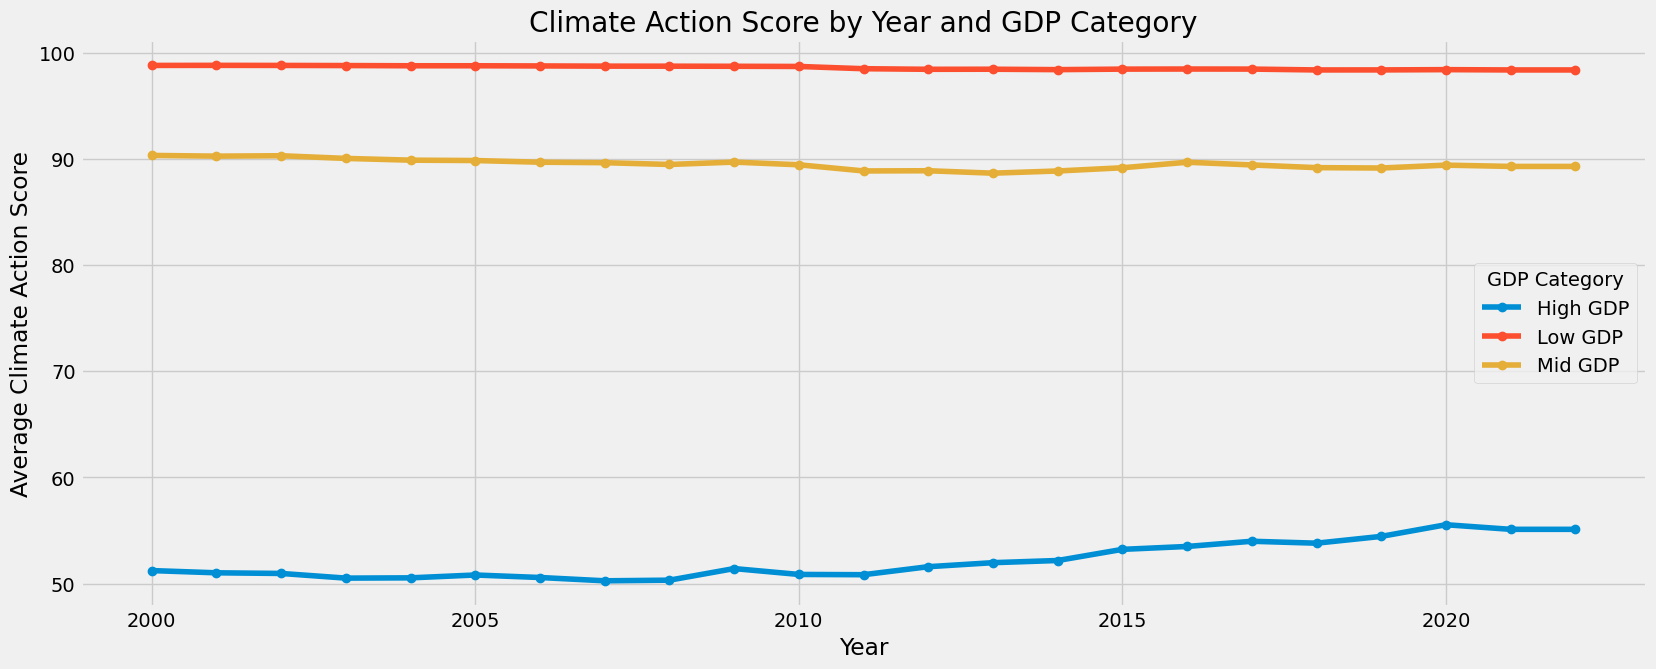

In [25]:
# Calculate the mean Climate Action for each year and GDP category
df['mean_climate_action'] = df.groupby(['year', 'gdp_category'])['climate_action'].transform('mean')

# Create a crosstab with mean SDG indexes
crosstab = pd.crosstab(index=df['year'], columns=df['gdp_category'], values=df['mean_climate_action'], aggfunc='last')

# Plot the crosstab as lines
crosstab.plot(kind='line', marker='o')

# Customize the plot (labels, title, legend, etc.)
plt.xlabel('Year')
plt.ylabel('Average Climate Action Score')
plt.title('Climate Action Score by Year and GDP Category')
plt.legend(title='GDP Category')

# Show the plot
plt.show()

#### Looking at the Climate Action Score and its growth over the years for GDP categories, we can see that that low GDP countries continuously keep having high progress scores (which we already discussed is probably the fact that they lack infrustructure and overall production that pollutes the environment). The high GDP countries while have a low progress score, there is a positive trend hapenning from 2011. 

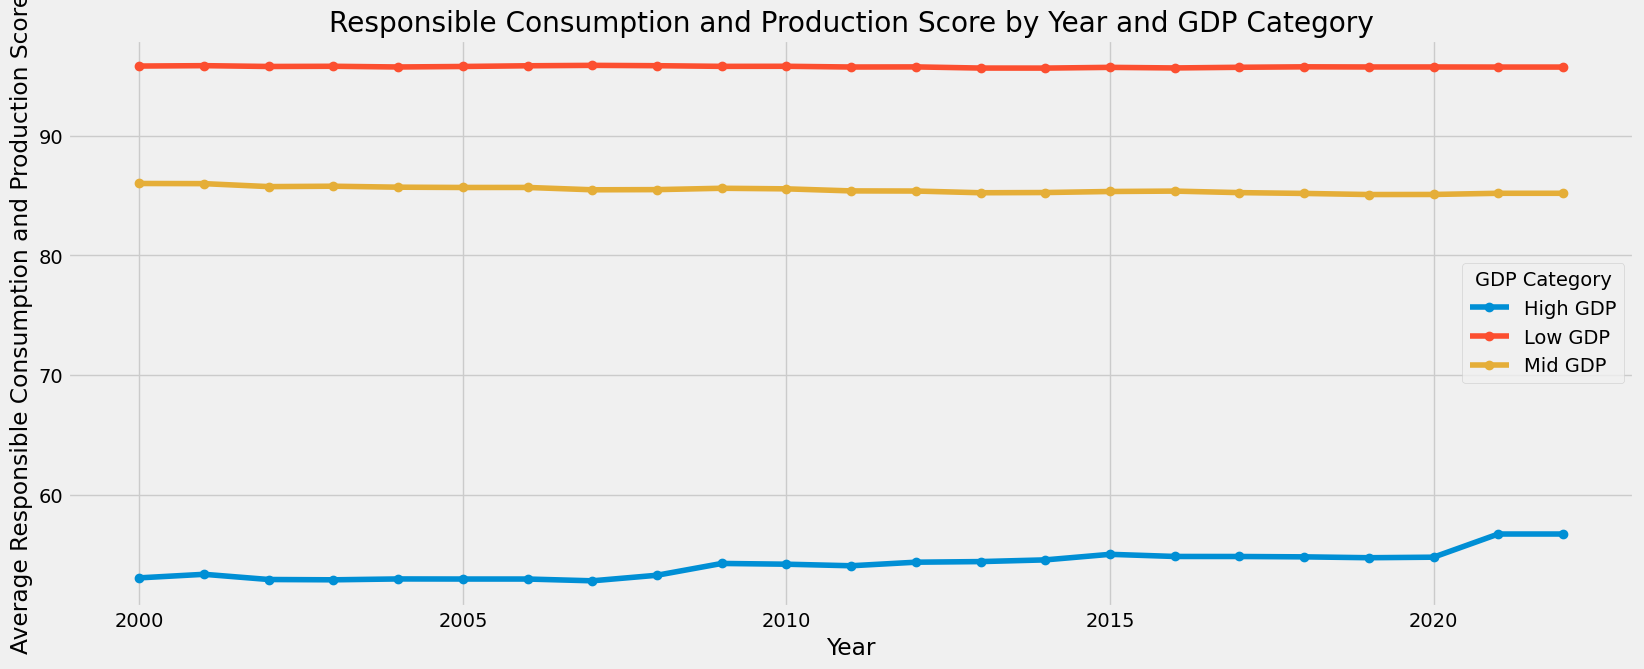

In [26]:
# Calculate the mean Responsible Consumption for each year and GDP category
df['mean_responsible'] = df.groupby(['year', 'gdp_category'])['responsible_consumption'].transform('mean')

# Create a crosstab with mean SDG indexes
crosstab = pd.crosstab(index=df['year'], columns=df['gdp_category'], values=df['mean_responsible'], aggfunc='last')

# Plot the crosstab as lines
crosstab.plot(kind='line', marker='o')

# Customize the plot (labels, title, legend, etc.)
plt.xlabel('Year')
plt.ylabel('Average Responsible Consumption and Production Score')
plt.title('Responsible Consumption and Production Score by Year and GDP Category')
plt.legend(title='GDP Category')

# Show the plot
plt.show()

#### Similarly as with Climate Action, Responsible Consumption and Production sees High GDP countries holding a fairly low progress score with a positive trend in the last couple of years. 

In [27]:
df.columns

Index(['country', 'year', 'sdg_index', 'no_poverty', 'zero_hunger',
       'good_health', 'quality_education', 'gender_equality', 'clean_water',
       'affordable_energy', 'economic_growth', 'infrastructure_innovation',
       'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
       'climate_action', 'underwater_life', 'land_life', 'peace_justice',
       'partnerships', 'gdp', 'gdp_category', 'mean_sdg_index',
       'mean_climate_action', 'mean_responsible'],
      dtype='object')

### Plotting all Goals by Years

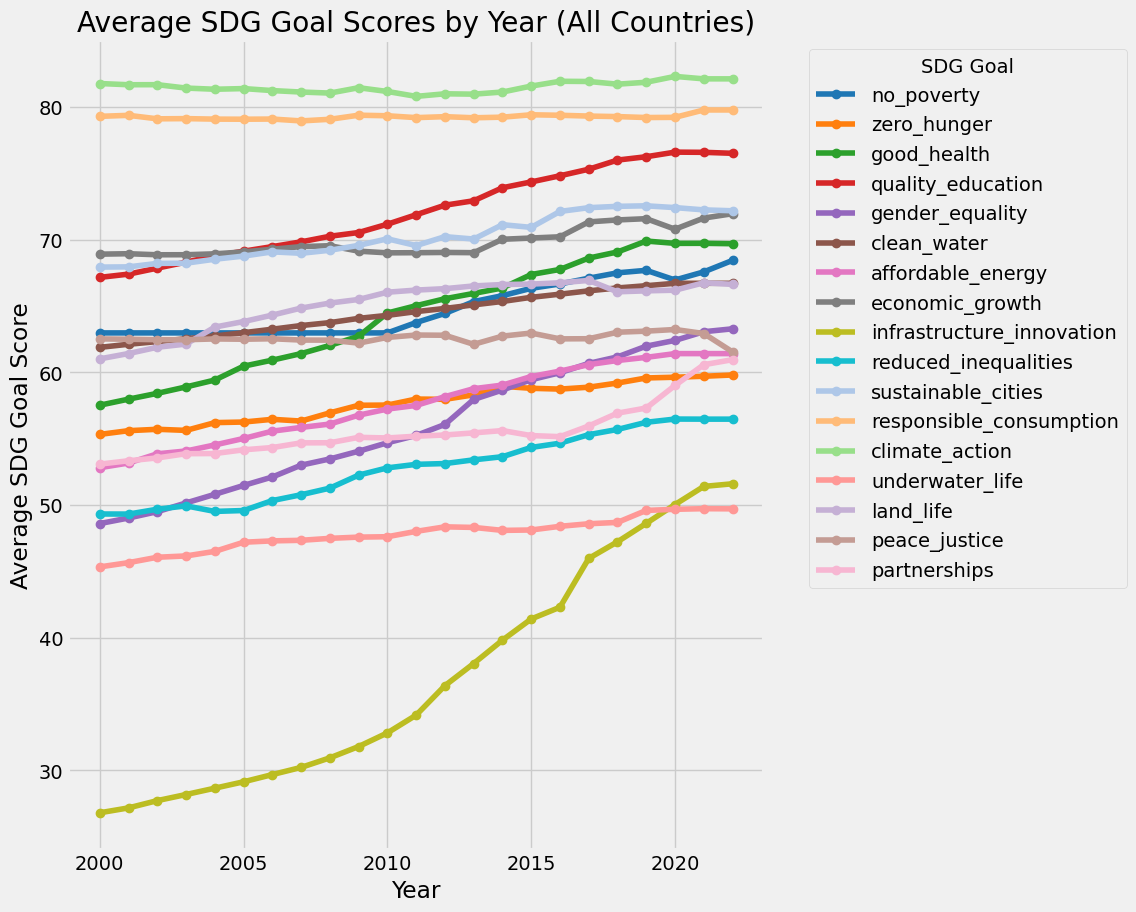

In [28]:
# Define a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2']

# Create an empty figure and axis
fig, ax = plt.subplots(figsize=(8, 10)) 

# List of SDG Goal column names
sdg_goals = [
    'no_poverty', 'zero_hunger', 'good_health', 'quality_education', 'gender_equality',
    'clean_water', 'affordable_energy', 'economic_growth', 'infrastructure_innovation',
    'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
    'climate_action', 'underwater_life', 'land_life', 'peace_justice', 'partnerships'
]

# Loop through each SDG Goal score
for i, goal in enumerate(sdg_goals):
    # Calculate the mean score for each year and all countries for the current SDG Goal
    df[f'mean_{goal}'] = df.groupby(['year'])[goal].transform('mean')

    # Create a crosstab with mean scores for the current SDG Goal
    crosstab = pd.crosstab(index=df['year'], columns=goal, values=df[f'mean_{goal}'], aggfunc='last')

    # Plot the crosstab as lines with custom colors
    crosstab.plot(kind='line', marker='o', ax=ax, label=goal, color=colors[i])

# Customize the plot (labels, title, etc.)
plt.xlabel('Year')
plt.ylabel('Average SDG Goal Score')
plt.title('Average SDG Goal Scores by Year (All Countries)')

# Move the legend outside of the chart
plt.legend(title='SDG Goal', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

#### Out of all goals, it seems that Infrastructure and Innovation and Quality Education progress has improved the most on average in the World, while Climate Action and Responsible Consumption have stayed fairly unchaged. Peace and Justice is the only one that in the last 2 years has developed a clear downword trend. I'd like to analyse which countries specifically have been dragging this score down.

In [48]:
# Filter the DataFrame for the years 2020, 2021, and 2022
filtered_df = df[df['year'].isin([2020, 2021, 2022])]

# Pivot the DataFrame with "country" as the index
pivoted_df = filtered_df.pivot(index=None, columns=['year', 'country'], values='peace_justice')

# Check for countries with a decreasing score from 2020 to 2022
countries_with_decreasing_score = pivoted_df[pivoted_df[2022] < pivoted_df[2020]].index

# Map index labels to country names
countries_with_decreasing_score_names = df.loc[countries_with_decreasing_score]['country']

In [47]:
countries_with_decreasing_score_names.nunique()

165

#### Out of 193 UN countries, 165 countries had a decreasing Peace and Justice Score from 2020 until 2022

### Countries That Made The Biggest Leap for Each Goal

In [49]:
# List of SDG Goal column names
sdg_goals = [
    'no_poverty', 'zero_hunger', 'good_health', 'quality_education', 'gender_equality',
    'clean_water', 'affordable_energy', 'economic_growth', 'infrastructure_innovation',
    'reduced_inequalities', 'sustainable_cities', 'responsible_consumption',
    'climate_action', 'underwater_life', 'land_life', 'peace_justice', 'partnerships'
]

# Create a list to store results
results = []

# Loop through each SDG Goal score
for goal in sdg_goals:
    # Calculate the mean score for each year and country for the current SDG Goal
    df[f'mean_{goal}'] = df.groupby(['year', 'country'])[goal].transform('mean')
    
    # Find the first and last years in the data
    min_year = df['year'].min()
    max_year = df['year'].max()

    # Initialize variables to track the biggest leap
    biggest_leap_percentage = 0
    biggest_leap_country = None

    # Loop through each country to find the biggest leap
    for country in df['country'].unique():
        start_year = min_year
        while start_year <= max_year:
            start_score = df[(df['country'] == country) & (df['year'] == start_year)][f'mean_{goal}'].values[0]
            if start_score != 0:
                break
            start_year += 1
        
        end_score = df[(df['country'] == country) & (df['year'] == max_year)][f'mean_{goal}'].values[0]
        
        if start_score == 0:
            percentage_increase = float('inf')
        else:
            percentage_increase = ((end_score - start_score) / start_score) * 100

        # Check if this is the biggest leap for the current goal score
        if not pd.isnull(percentage_increase) and percentage_increase > biggest_leap_percentage:
            biggest_leap_percentage = percentage_increase
            biggest_leap_country = country

    # Check if the biggest leap is not "inf" (i.e., the country made progress)
    if biggest_leap_percentage != float('inf'):
        # Append the result to the results list
        results.append({'Goal': goal, 'Country': biggest_leap_country, 'Percentage Increase': biggest_leap_percentage})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [50]:
results_df

,Goal,Country,Percentage Increase
0,zero_hunger,South Sudan,153.846154
1,good_health,Uganda,196.987952
2,quality_education,Ethiopia,7825.000000
3,gender_equality,Djibouti,1022.857143
4,clean_water,Afghanistan,55.555556
5,affordable_energy,Lesotho,627.777778
6,economic_growth,Montenegro,30.785563
7,infrastructure_innovation,Republic of the Congo,1925.000000
8,sustainable_cities,Mali,81.268882
9,responsible_consumption,Switzerland,35.348837


### Checking countries that had made 0 progress on certain goals

In [55]:
# List of SDG Goal column names
sdg_goals = [
    'no_poverty', 'zero_hunger', 'good_health', 'quality_education', 'gender_equality',
    'clean_water', 'affordable_energy', 'economic_growth', 'infrastructure_innovation',
    'reduced_inequalities', 'sustainable_cities', 'responsible_consumption', 'climate_action',
    'underwater_life', 'land_life', 'peace_justice', 'partnerships'
]

# Loop through each SDG Goal
for goal in sdg_goals:
    # Filter the DataFrame to get rows where the goal score is always 0
    zero_score_countries = df[df.groupby('country')[goal].transform('sum') == 0]['country'].unique()

    # Calculate the count of countries with 0 score for the current goal
    count_of_countries = len(zero_score_countries)

    # Print the result for the current goal
    print(f"Goal {goal.replace('_', ' ').title()} with 0 scores has a country count of {count_of_countries}. Countries: {', '.join(zero_score_countries)}")

Goal No Poverty with 0 scores has a country count of 15. Countries: The Bahamas, Bahrain, Brunei, Burundi, Cambodia, Cuba, Iraq, Kuwait, New Zealand, Oman, Qatar, Singapore, Suriname, Syria, Ukraine
Goal Zero Hunger with 0 scores has a country count of 0. Countries: 
Goal Good Health with 0 scores has a country count of 0. Countries: 
Goal Quality Education with 0 scores has a country count of 0. Countries: 
Goal Gender Equality with 0 scores has a country count of 0. Countries: 
Goal Clean Water with 0 scores has a country count of 0. Countries: 
Goal Affordable Energy with 0 scores has a country count of 0. Countries: 
Goal Economic Growth with 0 scores has a country count of 0. Countries: 
Goal Infrastructure Innovation with 0 scores has a country count of 0. Countries: 
Goal Reduced Inequalities with 0 scores has a country count of 16. Countries: Afghanistan, The Bahamas, Bahrain, Belize, Brunei, Cambodia, Cuba, Guyana, Kuwait, Oman, Qatar, Saudi Arabia, Singapore, Suriname, Trinid

#### Important to note, that countries with a 0 score could indicate no progress made, or that the indicators haven't been submitted for the analysis. <br>

No Poverty has 15 countries with 0 score over the years <br>
Reduced Inequalities have 16 countries with 0 score over the years <br>
Underwater Life has 40 countries with 0 score over the years - these might include the countries that don't have a boarder with water. More analysis necessary to confirm.

In [56]:
# Import ".json" file for the world map using Geopandas

country_geo = gpd.read_file(r'C:/Users\vaiva\OneDrive\Documents\CareerFoundry\Achievement 6 SDG\02 Data\Prepared Data\world-countries.json')

In [57]:
# Creating a subset with the countries that have 0 score on Underwater Life Score

# List of countries to include in the subset
countries_to_include = [
    'Afghanistan', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan', 'Bolivia', 'Botswana',
    'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Czech Republic', 'Eswatini', 
    'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Lesotho', 'Luxembourg', 'Malawi',
    'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger', 'North Macedonia', 'Paraguay', 'Rwanda',
    'Serbia', 'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan', 'Turkmenistan', 'Uganda',
    'Uzbekistan', 'Zambia', 'Zimbabwe'
]

# Subset the DataFrame to include only 'country' and 'underwater_life' columns for the specified countries
subset_water = df[df['country'].isin(countries_to_include)][['country', 'underwater_life']]

In [58]:
# Renaming the column in Json file to country

country_geo = country_geo.rename(columns={'name': 'country'})

In [59]:
# Creating a subset with the countries that have 0 score on Underwater Life Score

# List of countries to include in the subset
countries_to_include = [
    'Afghanistan', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bhutan', 'Bolivia', 'Botswana',
    'Burkina Faso', 'Burundi', 'Central African Republic', 'Chad', 'Czech Republic', 'Eswatini', 
    'Ethiopia', 'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Lesotho', 'Luxembourg', 'Malawi',
    'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger', 'North Macedonia', 'Paraguay', 'Rwanda',
    'Serbia', 'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan', 'Turkmenistan', 'Uganda',
    'Uzbekistan', 'Zambia', 'Zimbabwe'
]

# Subset the DataFrame to include only 'country' and 'underwater_life' columns for the specified countries
subset_water = df[df['country'].isin(countries_to_include)][['country', 'underwater_life']]

# Setup a folium map at a high-level zoom
map = folium.Map(location = [0, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = subset_water,
    columns = ['country', 'underwater_life'],
    key_on = 'feature.properties.country',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Life Under Water").add_to(map)
folium.LayerControl().add_to(map)

map

#### My hypothesis that most countries that have 0 progress score on Life under Water Goal are actually located inland seems to be partially correct. Only a few countries in the Middle East have access to a sea, but none of these countries have access to an ocean.